In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sympy import var, plot_implicit, Eq
import pandas as pd
import numpy as np
import scipy.stats as st

# Задача 1.1.

In [ ]:
with open('/content/drive/MyDrive/body.txt', 'r') as f:
    data = f.readlines()

In [ ]:
df = pd.DataFrame([el.replace('\n', '').replace('  ', ' ').split(' ') for el in data])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21.0,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23.0,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28.0,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23.0,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22.0,78.8,187.2,1


In [ ]:
df = df[[22, 23, 24]]
df.columns=['weight', 'height', 'sex']
df

,weight,height,sex
0,65.6,174.0,1
1,71.8,175.3,1
2,80.7,193.5,1
3,72.6,186.5,1
4,78.8,187.2,1
...,...,...,...
502,71.8,176.5,0
503,55.5,164.4,0
504,48.6,160.7,0
505,66.4,174.0,0


In [ ]:
df['weight'] = list(map(float, df['weight']))
df['height'] = list(map(float, df['height']))

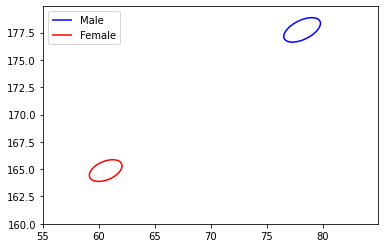

In [ ]:
sex = '1'
A = np.cov(df[df.sex==sex]['weight'], df[df.sex==sex]['height'])
S = np.linalg.inv(A)
x_ = df[df.sex==sex]['weight'].mean()
y_ = df[df.sex==sex]['height'].mean()
level = st.chi2.isf(0.05, df=2)
n = len(df[df.sex==sex]['weight'])
f = lambda x, y: (np.array([x_, y_]) - np.array([x, y])).dot(S).dot(np.array([x_, y_]) - np.array([x, y])) - level / n

delta = 0.1
xrange = np.arange(55, 85, delta)
yrange = np.arange(160, 180, delta)
X, Y = np.meshgrid(xrange,yrange)

Z = np.array([np.array([f(x, y) for x in xrange]) for y in yrange])

p = plt.contour(X, Y, Z, [0], colors='b')
p.collections[0].set_label('Male')



sex = '0'
A = np.cov(df[df.sex==sex]['weight'], df[df.sex==sex]['height'])
S = np.linalg.inv(A)
x_ = df[df.sex==sex]['weight'].mean()
y_ = df[df.sex==sex]['height'].mean()
level = st.chi2.isf(0.05, df=2)
n = len(df[df.sex==sex]['weight'])
f = lambda x, y: (np.array([x_, y_]) - np.array([x, y])).dot(S).dot(np.array([x_, y_]) - np.array([x, y])) - level / n

delta = 0.1
xrange = np.arange(55, 85, delta)
yrange = np.arange(160, 180, delta)
X, Y = np.meshgrid(xrange,yrange)

Z = np.array([np.array([f(x, y) for x in xrange]) for y in yrange])


p = plt.contour(X, Y, Z, [0], colors='r')

p.collections[0].set_label('Female')
plt.legend(loc='upper left')
plt.show()


# Задача 1.2.

In [ ]:
with open('/content/drive/MyDrive/michelson.txt', 'r') as f:
    data = f.readlines()

data = list(map(lambda x: x.replace('\n', '').split('\t'), data))
df = pd.DataFrame(data[1:], columns=data[0])
df.all_measurements = list(map(float, df.all_measurements))
df.Trial_No = list(map(int, df.Trial_No))

In [ ]:
x = df['all_measurements'].mean()
n = len(df['all_measurements'])
std = df['all_measurements'].std()
quant = st.norm.isf(0.05/2)

In [ ]:
x - quant * std / n**0.5, x + quant * std / n**0.5

(836.9142171875878, 867.8857828124121)

In [ ]:
df

,all_measurements,Trial_No
0,850.0,1
1,740.0,1
2,900.0,1
3,1070.0,1
4,930.0,1
...,...,...
95,940.0,5
96,950.0,5
97,800.0,5
98,810.0,5


# Задача 1.3.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/amazon-books.txt', sep='\t')

In [ ]:
df.head()

,Title,Author,List Price,Amazon Price,Hard/ Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight (oz)
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,0061564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,0307265722,8.0,5.2,1.4,22.4


In [ ]:
df = df.dropna()

In [ ]:
X = df['Amazon Price']
Y = df['NumPages']

In [ ]:
s = st.pearsonr(X, Y)[0]
s

0.07703422433455244

In [ ]:
mean_ = (X.mean(), Y.mean())
cov_ = np.cov([X, Y])
n = len(X)

repeats = 10000
res = []
for i in range(repeats):
    V = st.multivariate_normal.rvs(mean=mean_, cov=cov_, size=n)

    res.append(st.pearsonr(V.T[0], V.T[1])[0])

res = np.array(res)

alpha = 0.05

print(
    f'Percentile interval: {np.quantile(res, alpha/2), np.quantile(res, 1-alpha/2)}'
)


deltas = (np.array(res) - s)

print(
    f'Pivotal interval: {s - np.quantile(deltas, 1-alpha/2), s - np.quantile(deltas, alpha/2)}'
)

Percentile interval: (-0.037134250246674175, 0.18649594995453903)
Pivotal interval: (-0.03242750128543416, 0.19120269891577904)
